# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [111]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
from random import uniform
from pprint import pprint 
import logging
from scipy import stats

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [112]:
# List for holding lat_lngs and cities

lat_lngs = []
cities = []
name = []
country_code = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=500)

# List of pairs of coordinates
lat_lngs = zip(lats, lngs)
lat_lngs=list(lat_lngs)
len(lat_lngs)

# for x in range(len(lat_lngs)): 
#     print (lat_lngs[x])

# Identify nearest city for each lat, lng combination
for coordinate_pair in lat_lngs:
    lat, lon = coordinate_pair
    cities.append(citipy.nearest_city(lat, lon))

# Append cities and country codes to their respective lists
for city in cities:
    country_code.append(city.country_code) 
    name.append(city.city_name)
    #print(f"The country code of {name} is {country_code}")

# print(country_code)
# If the city is unique, then add it to a our cities list
if city not in cities:
    cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

500

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
####

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

In [113]:
# Set retreival URL and lists to append retrieve data
url = "http://api.openweathermap.org/data/2.5/weather?"
temp = []
cloudiness = []
humidity = []
max_temp =[]
wind = []

# Retrieve data and print results from retrieval
print(f"Beginning Data Retrieval\n-------------------------------")
counter=0
for i in lat_lngs:
    counter=counter+1
    try:
        response = requests.get(url + "appid=" + api_key + "&units=metric&lat=" + str(i[0]) + "&lon=" + str(i[1])).json()
        temp.append(response['main']['temp'])
        cloudiness.append(response['clouds']['all'])
        humidity.append(response['main']['humidity'])
        max_temp.append(response['main']['temp_max'])
        wind.append(response['wind']['speed'])   
        print(f"Processing Record {counter} | {name[counter-1]}")
    except (requests.exceptions.HTTPError):
        print(f"Processing Record {counter} | {name[counter-1]}")
        print(f"City not found. Skipping....")
        
# Put data in a dictionary
lat,lon = map(list,zip(*lat_lngs))
weather_dict = {
    "City": name,
     "Country": country_code,
    "Latitude": lat,
    "Longitude": lon,
    "Temperature": temp,
    "Cloudiness": cloudiness,
    "Humidity" : humidity,
    "Maximum temperature" : max_temp,
    "Wind speed" : wind
}
    

Beginning Data Retrieval
-------------------------------
Processing Record 1 | tasiilaq
Processing Record 2 | upernavik
Processing Record 3 | khatanga
Processing Record 4 | saint george
Processing Record 5 | atuona
Processing Record 6 | mahebourg
Processing Record 7 | avarua
Processing Record 8 | hailar
Processing Record 9 | san luis
Processing Record 10 | nikolskoye
Processing Record 11 | provideniya
Processing Record 12 | bluff
Processing Record 13 | ushuaia
Processing Record 14 | taksimo
Processing Record 15 | cimislia
Processing Record 16 | taolanaro
Processing Record 17 | barentsburg
Processing Record 18 | nishihara
Processing Record 19 | qaanaaq
Processing Record 20 | chuy
Processing Record 21 | rikitea
Processing Record 22 | qaqortoq
Processing Record 23 | tasiilaq
Processing Record 24 | cape town
Processing Record 25 | amderma
Processing Record 26 | pabrade
Processing Record 27 | bluff
Processing Record 28 | yellowknife
Processing Record 29 | bethel
Processing Record 30 | henti

Processing Record 247 | busselton
Processing Record 248 | sur
Processing Record 249 | necochea
Processing Record 250 | vaini
Processing Record 251 | avarua
Processing Record 252 | port elizabeth
Processing Record 253 | vaini
Processing Record 254 | busselton
Processing Record 255 | jalu
Processing Record 256 | ribeira grande
Processing Record 257 | dingle
Processing Record 258 | carnarvon
Processing Record 259 | marshalltown
Processing Record 260 | sentyabrskiy
Processing Record 261 | indianola
Processing Record 262 | vaini
Processing Record 263 | mataura
Processing Record 264 | yertsevo
Processing Record 265 | vaini
Processing Record 266 | ushuaia
Processing Record 267 | bonfim
Processing Record 268 | kokkola
Processing Record 269 | dalvik
Processing Record 270 | yumen
Processing Record 271 | rikitea
Processing Record 272 | ponta do sol
Processing Record 273 | puerto ayora
Processing Record 274 | hobart
Processing Record 275 | alice springs
Processing Record 276 | stoyba
Processing Re

Processing Record 492 | anjozorobe
Processing Record 493 | puerto ayora
Processing Record 494 | nikolskoye
Processing Record 495 | thai binh
Processing Record 496 | kodiak
Processing Record 497 | jamestown
Processing Record 498 | rikitea
Processing Record 499 | mataura
Processing Record 500 | bluff


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
####

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

In [5]:
####

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


In [114]:
# Create dataframe
weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City                   500
Country                500
Latitude               500
Longitude              500
Temperature            500
Cloudiness             500
Humidity               500
Maximum temperature    500
Wind speed             500
dtype: int64

In [115]:
# Export to CVS
weather_data.to_csv('weather_data.csv')

# Preview dataframe
weather_data.head()

,City,Country,Latitude,Longitude,Temperature,Cloudiness,Humidity,Maximum temperature,Wind speed
0,tasiilaq,gl,57.025411,-36.629848,10.35,100,93,10.35,7.09
1,upernavik,gl,89.164039,-46.974190,0.65,100,95,0.65,6.09
2,khatanga,ru,85.599333,94.665341,0.45,100,97,0.45,7.77
3,saint george,bm,31.398711,-58.427677,24.45,100,67,24.45,4.90
4,atuona,pf,-11.220815,-141.724872,26.55,19,75,26.55,8.07


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

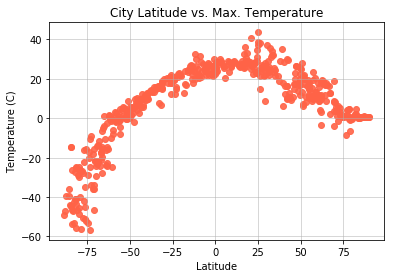

In [116]:
fig, ax = plt.subplots()


plt.scatter(lat, max_temp, marker="o", facecolors="tomato",  alpha=0.9)

ax.grid(linestyle='-', linewidth='0.5',)
plt.title('City Latitude vs. Max. Temperature')

plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
fig.savefig("LatvsTemp.png")
plt.show()

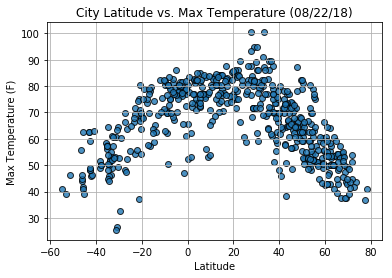

In [6]:
###

#### Latitude vs. Humidity Plot

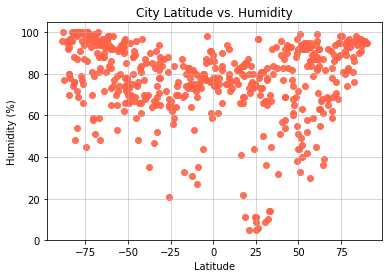

In [117]:
fig, ax = plt.subplots()

plt.scatter(lat, humidity, marker="o", facecolors="tomato",  alpha=0.9)

ax.grid(linestyle='-', linewidth='0.5',)
plt.title('City Latitude vs. Humidity')

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
fig.savefig("LatvsHum.png")
plt.show()

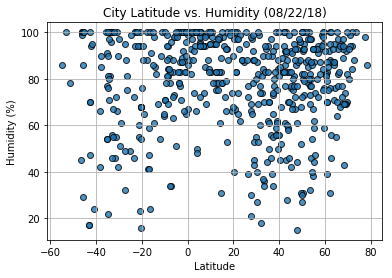

In [7]:
###

#### Latitude vs. Cloudiness Plot

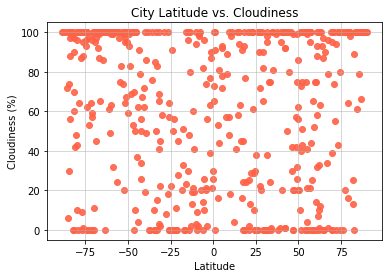

In [118]:
fig, ax = plt.subplots()

plt.scatter(lat, cloudiness, marker="o", facecolors="tomato", alpha=0.9)

ax.grid(linestyle='-', linewidth='0.5',)
plt.title('City Latitude vs. Cloudiness')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
fig.savefig('LatvsCloud.png')
plt.show()

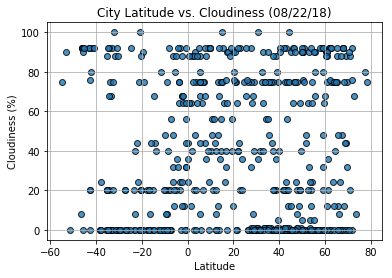

In [8]:
###

#### Latitude vs. Wind Speed Plot

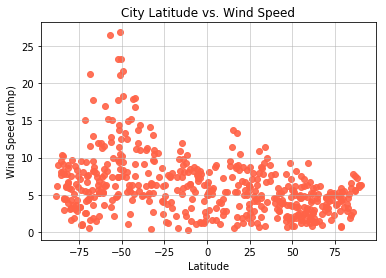

In [120]:
fig, ax = plt.subplots()

plt.scatter(lat, wind, marker="o", facecolors="tomato", alpha=0.9)

ax.grid(linestyle='-', linewidth='0.5',)
plt.title('City Latitude vs. Wind Speed')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mhp)')
fig.savefig("LatvsWind.png")
plt.show()

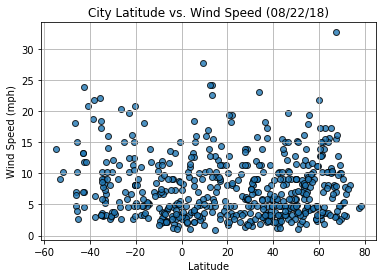

In [9]:
###

#### Written description of the above observable trends based on the data

In [130]:
print(f"--------------------------------\nExcercise conclusions\n-------------------------------\n")
print(f"When analyzing weather characteristics for a range of random coordinates,")
print(f"we could observe that there is no clear trend on between cloudiness, wind speed,")
print(f"and humidity.") 
print(f"However, when looking at temperature there seems to be a higher maximum temperature as")
print(f"cities get closer to the equator.")


--------------------------------
Excercise conclusions
-------------------------------

When analyzing weather characteristics for a range of random coordinates,
we could observe that there is no clear trend on between cloudiness, wind speed,
and humidity.
However, when looking at temperature there seems to be a higher maximum temperature as
cities get closer to the equator.
